### Step 1. 필요한 라이브러리 임포트

In [2]:
import pandas as pd

### Step 2. [데이터](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv) 확인

### Step 3. 데이터 불러오기


**read_csv를 통해 데이터를 올바른 형태로 불러온 뒤 drinks 저장해주세요**  
data : drinks.csv

In [46]:
drinks = pd.read_csv('C:/STUDY/Pandas/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### Step 4. 어느 대륙(continent)이 평균 맥주 소모량이 가장 높은가요?

EU

In [43]:
grouped = drinks.groupby('continent')
drinks['max'] = drinks['beer_servings'].max()

df= drinks[drinks['beer_servings'] == drinks['max'].max() ]
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,max
117,Namibia,376,3,1,6.8,AF,376


In [124]:
#풀이
drinks_continent_mean = drinks.groupby('continent')['beer_servings'].mean()
drinks_continent_mean[drinks_continent_mean == drinks_continent_mean.max()].index[0]

'EU'

### Step 5. 각 대륙(continent)별 와인 소모 통계값 계산해주세요

count, mean,std, min, max값은 'describe'를 통해 한번에 조회할 수 있습니다

groupby후 describe를 적용해보세요

In [125]:
grouped = drinks.groupby('continent')    
grouped['wine_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [126]:
#풀이
drinks.groupby('continent')['wine_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


### Step 6. 평균 알코올 소비량을 대륙별로 조회해주세요

Hint: 대륙별로 모든 column에 대하여 평균값을 구해주세요

In [50]:
grouped = drinks.groupby('continent')   #drinks.groupby('continent').mean()  
grouped.mean()                          #drinks.groupby('continent')[['beer_servings','spirit_servings','wine_servings']].mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. 알코올 소비량 중간값을 대륙별로 조회해주세요

Hint: 대륙별로 모든 column에 대하여 중간값을 구해주세요

중간값은 .median()으로 구합니다

In [51]:
grouped = drinks.groupby('continent')   # drinks.groupby('continent').median()
grouped.median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. 증류주(spirit) 소비량의 평균, 최소, 최대값을 구해주세요

Hint: groupby와 agg 함수를 사용하여 한번에 표현해주세요

In [127]:
grouped = drinks.groupby('continent')
grouped['spirit_servings'].agg(['mean','min','max'])

,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
OC,58.437500,0,254
SA,114.750000,25,302


In [128]:
drinks.groupby('continent')['spirit_servings'].agg(['mean','min','max'])

,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
OC,58.437500,0,254
SA,114.750000,25,302


### Step 9. 대륙별 맥주 소비량의 평균을 Bar 그래프로 표현해주세요

In [64]:
import matplotlib.pyplot as plt

In [107]:
df =pd.DataFrame(grouped['beer_servings'].mean())
df

,beer_servings
continent,
AF,61.471698
AS,37.045455
EU,193.777778
OC,89.687500
SA,175.083333


<BarContainer object of 5 artists>

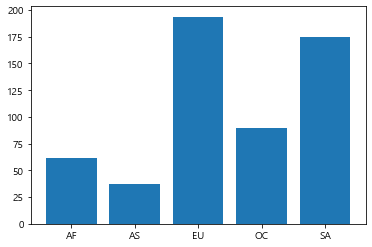

In [119]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

bar_plot = plt.figure()
axes1 = bar_plot.add_subplot(1,1,1)

axes1.bar(df.index,df['beer_servings'])

<AxesSubplot:xlabel='continent'>

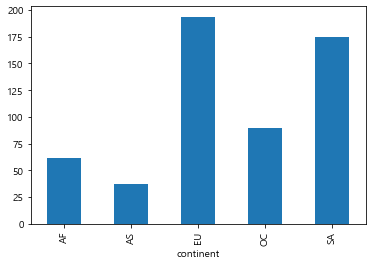

In [130]:
#풀이
drinks.groupby('continent')['beer_servings'].mean().plot.bar()   # plot(kind='bar')

- null값 확인하고 채우기

In [131]:
drinks.count()

country                         193
beer_servings                   193
spirit_servings                 193
wine_servings                   193
total_litres_of_pure_alcohol    193
continent                       170
dtype: int64

In [133]:
drinks[drinks['continent'].isnull()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


In [135]:
drinks.fillna('SA', inplace = True)